<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/AlexNet_%2B_Canny_Edge__(10epoch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Allows loading of operating system
import os
## Allows loading of image dataset
import cv2
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
## For array list
import numpy as np
## Allows selection of any images
import random
## Helps in resizing of images
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [4]:
## fucntion to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [5]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['cancer', 'normal']


In [6]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [7]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 21141 images belonging to 2 classes.
found 881 images belonging to 2 classes.
found 881 images belonging to 2 classes.


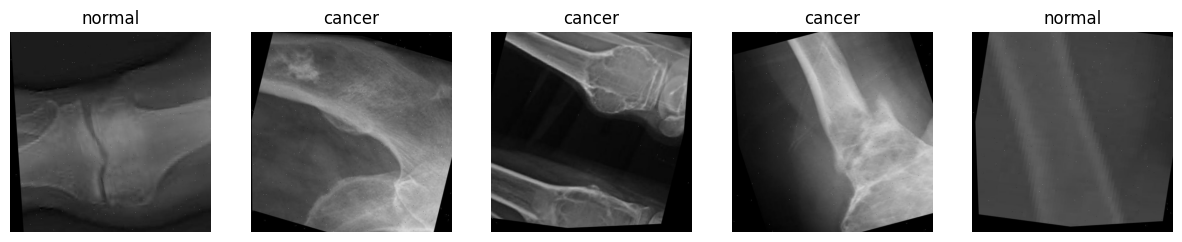

In [8]:


# Get classes (subfolders)
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    ## selecting image at random from the train dataset
    class_name = random.choice(classes)
    ##  class_path allows train_dataset to join with the class (normal,cancer,unlabelled)
    class_path = os.path.join(train_dataset, class_name)
    ## allows images to be selected at random from the class_path
    image_file = random.choice(os.listdir(class_path))
    ## joins image with the image file e.g (normal associate with normal and cancer associate with cancer)
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


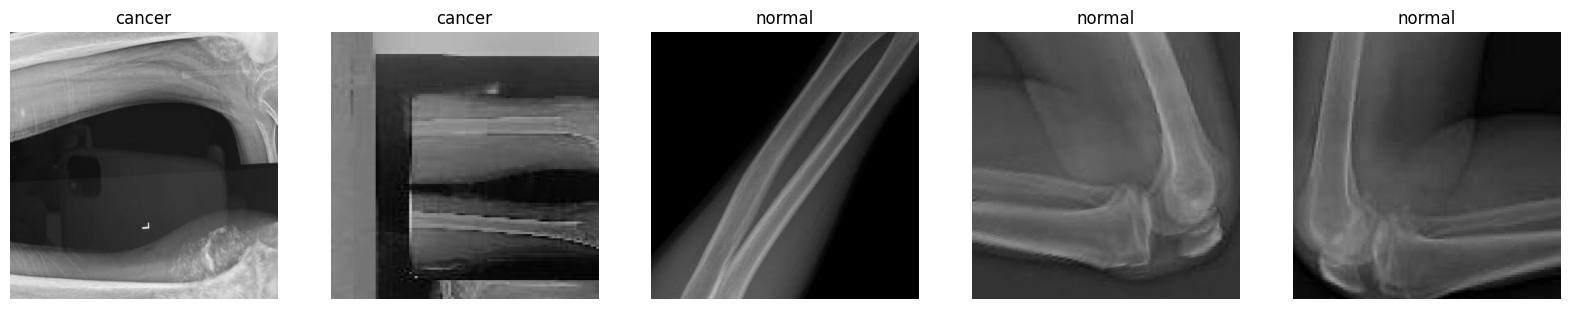

In [9]:


# Get classes (subfolders)
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    ## selecting image at random from the train dataset
    class_name = random.choice(classes)
    ##  class_path allows train_dataset to join with the class (normal,cancer,unlabled)
    class_path = os.path.join(test_dataset, class_name)
    ## allows images to be selected at random from the class_path
    image_file = random.choice(os.listdir(class_path))
    ## joins image with the image file e.g (normal associate with normal and cancer associate with cancer)
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


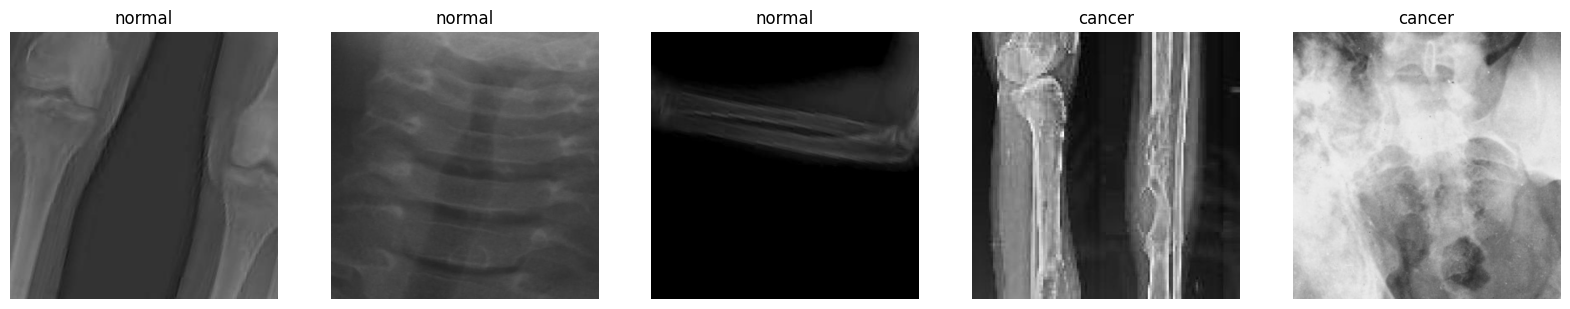

In [10]:


# Get classes (subfolders)
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    ## selecting image at random from the train dataset
    class_name = random.choice(classes)
    ##  class_path allows train_dataset to join with the class (normal,cancer,unlabled)
    class_path = os.path.join(valid_dataset, class_name)
    ## allows images to be selected at random from the class_path
    image_file = random.choice(os.listdir(class_path))
    ## joins image with the image file e.g (normal associate with normal and cancer associate with cancer)
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


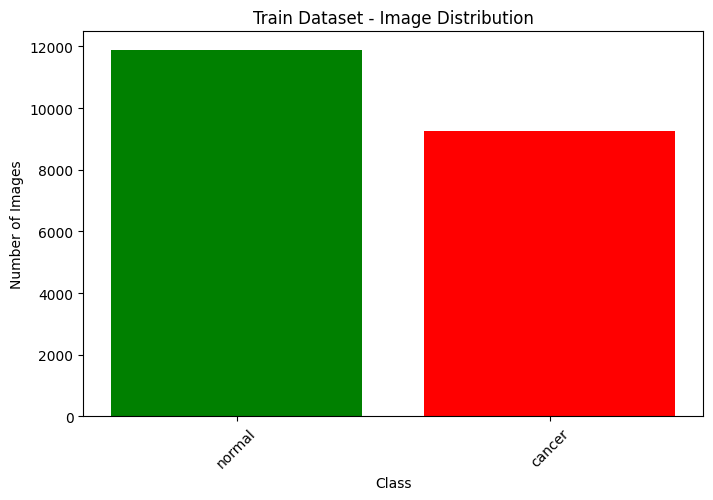

In [11]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



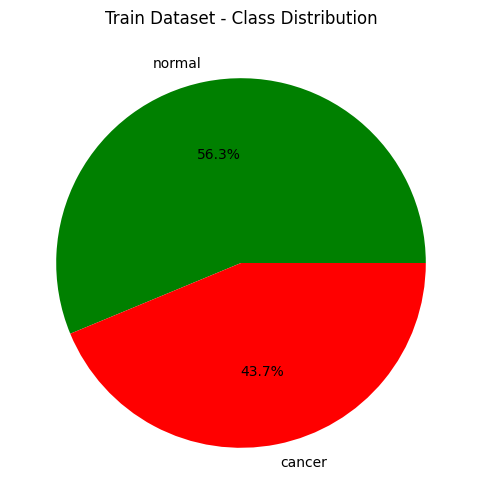

In [12]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

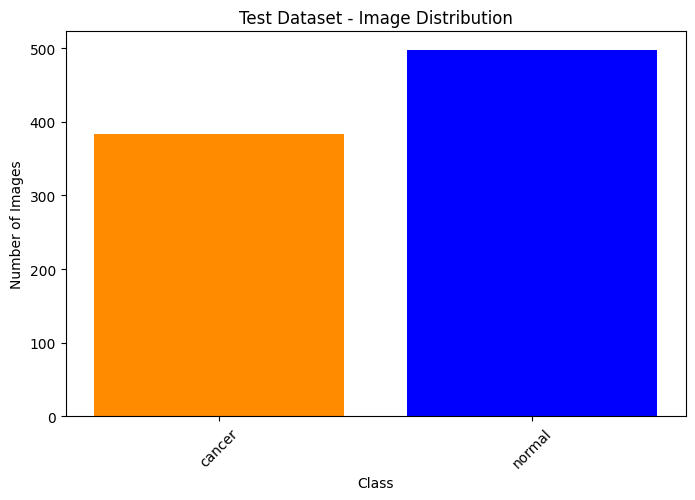

In [13]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



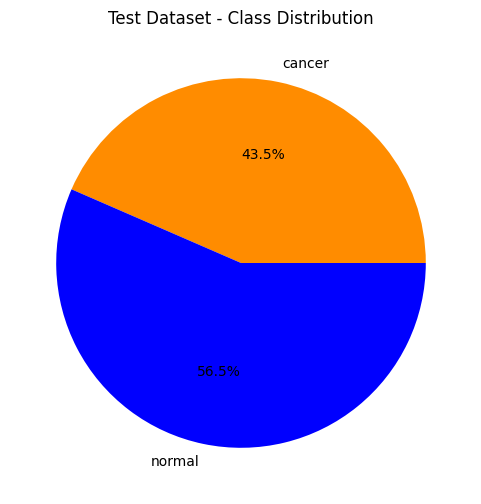

In [14]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

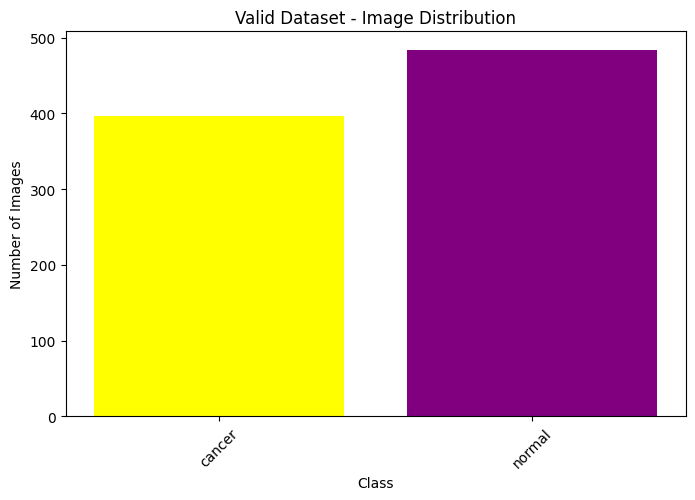

In [15]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



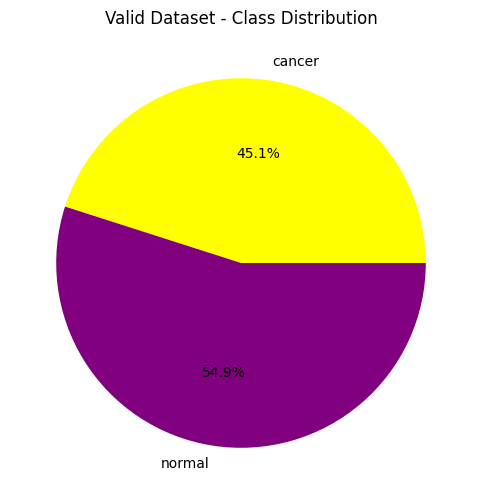

In [16]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [17]:
import pandas as pd

In [18]:
def preprocess_image(image_path):
    """
    Function to read an image, resize it, and apply Canny edge detection.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    edges = cv2.Canny(img, 100, 200)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return edges

In [19]:
def preprocess_and_load(image_path):
    """
    Load image and apply preprocessing using Canny edge detection.
    """
    img = preprocess_image(image_path)
    return img

In [20]:
datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_image
)

In [21]:
def create_dataframe(dataset_path):
    data = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                data.append([os.path.join(class_name, image_file), class_name])  # [image, label]
    return pd.DataFrame(data, columns=['image', 'label'])

train_df = create_dataframe(train_dataset)
test_df = create_dataframe(test_dataset)
valid_df = create_dataframe(valid_dataset)

In [22]:
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_dataframe(
    train_df,  # Changed from train_dataset to train_df
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset # Added directory argument
)
test_generator = datagen.flow_from_dataframe(
    test_df,  # Changed from test_dataset to test_df
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset # Added directory argument
)
valid_generator = datagen.flow_from_dataframe(
    valid_df,  # Changed from valid_dataset to valid_df
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=valid_dataset # Added directory argument
)

Found 21141 validated image filenames belonging to 2 classes.
Found 881 validated image filenames belonging to 2 classes.
Found 881 validated image filenames belonging to 2 classes.


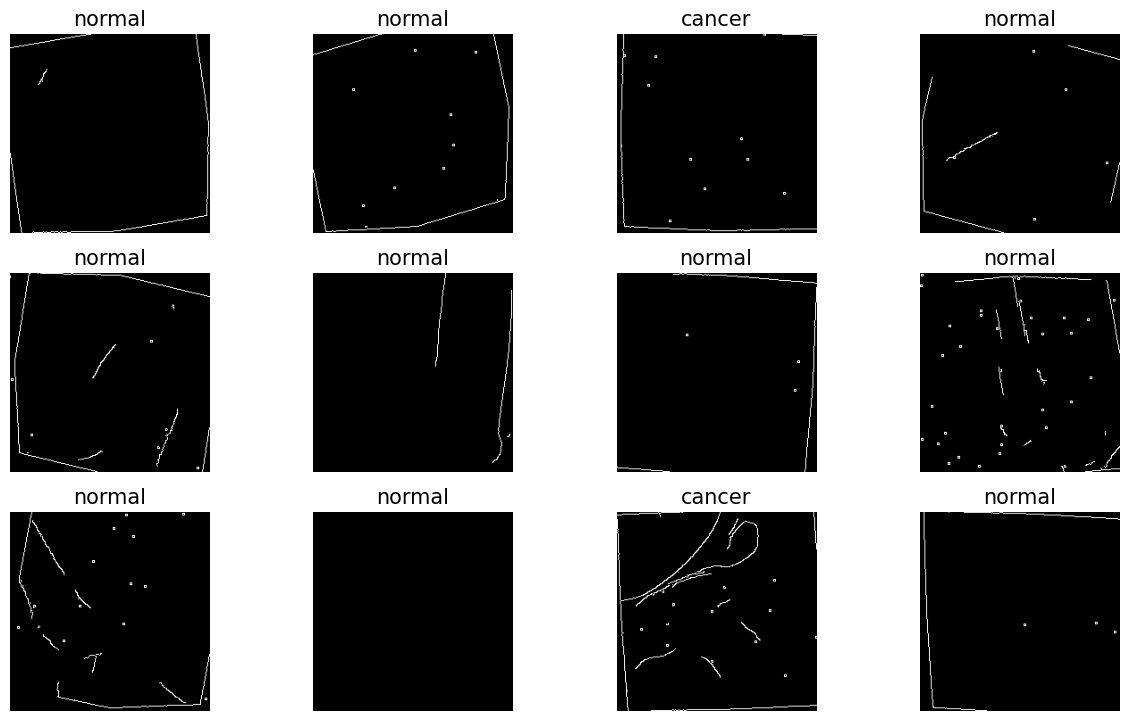

In [23]:
plt.figure(figsize=(15, 15))
for n, i in enumerate(np.random.randint(0, len(train_df), 12)): # Changed 'train' to 'train_df'
    plt.subplot(5, 4, n + 1)
    # Get the full image path by joining it with the train_dataset directory
    image_path = os.path.join(train_dataset, train_df.image[i])
    img = preprocess_image(image_path) # Changed 'train' to 'train_df'

    # Add a check to see if the image was loaded correctly
    if img is not None:
        plt.imshow(img)
        plt.axis('off')
        plt.title(train_df.label[i], fontsize=15) # Changed 'train' to 'train_df'
    else:
        print(f"Failed to load image: {image_path}") # Print an error message if image loading fails

plt.show()

In [24]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

class_num = 1  # Binary classification

model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Fourth Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Fifth Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,752,513 (178.35 MB)

 Trainable params: 46,751,809 (178.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [25]:
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras


In [26]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6640 - auc: 0.7058 - loss: 4.4468 - specificity_at_sensitivity: 0.8032

661/661 ━━━━━━━━━━━━━━━━━━━━ 3220s 5s/step - accuracy: 0.6641 - auc: 0.7059 - loss: 4.4435 - specificity_at_sensitivity: 0.8034 - val_accuracy: 0.5687 - val_auc: 0.7867 - val_loss: 1.4492 - val_specificity_at_sensitivity: 0.8715
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.7779 - auc: 0.8553 - loss: 0.7732 - specificity_at_sensitivity: 0.9417

661/661 ━━━━━━━━━━━━━━━━━━━━ 651s 985ms/step - accuracy: 0.7779 - auc: 0.8553 - loss: 0.7731 - specificity_at_sensitivity: 0.9417 - val_accuracy: 0.6583 - val_auc: 0.8771 - val_loss: 0.7639 - val_specificity_at_sensitivity: 0.9547
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 650s 983ms/step - accuracy: 0.8011 - auc: 0.8867 - loss: 0.5188 - specificity_at_sensitivity: 0.9634 - val_accuracy: 0.6322 - val_auc: 0.8424 - val_loss: 0.7750 - val_specificity_at_sensitivity: 0.9270
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.8165 - auc: 0.9007 - loss: 0.4385 - specificity_at_sensitivity: 0.9690

661/661 ━━━━━━━━━━━━━━━━━━━━ 646s 978ms/step - accuracy: 0.8165 - auc: 0.9007 - loss: 0.4385 - specificity_at_sensitivity: 0.9690 - val_accuracy: 0.8138 - val_auc: 0.9315 - val_loss: 0.3949 - val_specificity_at_sensitivity: 0.9899
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 647s 979ms/step - accuracy: 0.8259 - auc: 0.9100 - loss: 0.4099 - specificity_at_sensitivity: 0.9752 - val_accuracy: 0.8104 - val_auc: 0.9310 - val_loss: 0.4147 - val_specificity_at_sensitivity: 0.9798
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8218 - auc: 0.9102 - loss: 0.4198 - specificity_at_sensitivity: 0.9758

661/661 ━━━━━━━━━━━━━━━━━━━━ 650s 983ms/step - accuracy: 0.8218 - auc: 0.9102 - loss: 0.4198 - specificity_at_sensitivity: 0.9758 - val_accuracy: 0.8581 - val_auc: 0.9446 - val_loss: 0.3533 - val_specificity_at_sensitivity: 0.9975
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 645s 976ms/step - accuracy: 0.8264 - auc: 0.9163 - loss: 0.4047 - specificity_at_sensitivity: 0.9825 - val_accuracy: 0.8547 - val_auc: 0.9431 - val_loss: 0.3745 - val_specificity_at_sensitivity: 0.9874
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.8365 - auc: 0.9214 - loss: 0.3855 - specificity_at_sensitivity: 0.9776

661/661 ━━━━━━━━━━━━━━━━━━━━ 648s 981ms/step - accuracy: 0.8365 - auc: 0.9214 - loss: 0.3855 - specificity_at_sensitivity: 0.9776 - val_accuracy: 0.8876 - val_auc: 0.9574 - val_loss: 0.3010 - val_specificity_at_sensitivity: 0.9950
Epoch 9/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 651s 985ms/step - accuracy: 0.8359 - auc: 0.9228 - loss: 0.3791 - specificity_at_sensitivity: 0.9794 - val_accuracy: 0.8808 - val_auc: 0.9552 - val_loss: 0.3266 - val_specificity_at_sensitivity: 0.9975
Epoch 10/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 656s 993ms/step - accuracy: 0.8391 - auc: 0.9258 - loss: 0.3741 - specificity_at_sensitivity: 0.9807 - val_accuracy: 0.8706 - val_auc: 0.9466 - val_loss: 0.3326 - val_specificity_at_sensitivity: 0.9975


In [29]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy       auc      loss  specificity_at_sensitivity  val_accuracy  \
0  0.716049  0.769311  2.292879                    0.874040      0.568672   
1  0.789982  0.869824  0.666811                    0.949616      0.658343   
2  0.805307  0.892001  0.488978                    0.965077      0.632236   
3  0.816849  0.901633  0.433473                    0.969078      0.813848   
4  0.819261  0.905987  0.420717                    0.971673      0.810443   
5  0.820775  0.908558  0.431263                    0.975132      0.858116   
6  0.829194  0.917059  0.402141                    0.980322      0.854711   
7  0.836242  0.921254  0.385708                    0.978700      0.887628   
8  0.836148  0.922697  0.379091                    0.979349      0.880817   
9  0.841919  0.926703  0.373128                    0.981836      0.870602   

    val_auc  val_loss  val_specificity_at_sensitivity  
0  0.786732  1.449191                        0.871537  
1  0.877113  0.763862                        0.954660  
2  0.842364  0.775002                        0.926952  
3  0.931482  0.394880                        0.989924  
4  0.931014  0.414740                        0.979849  
5  0.944613  0.353326                        0.997481  
6  0.943099  0.374485                        0.987406  
7  0.957429  0.300955                        0.994962  
8  0.955193  0.326583                        0.997481  
9  0.946640  0.332567                        0.997481

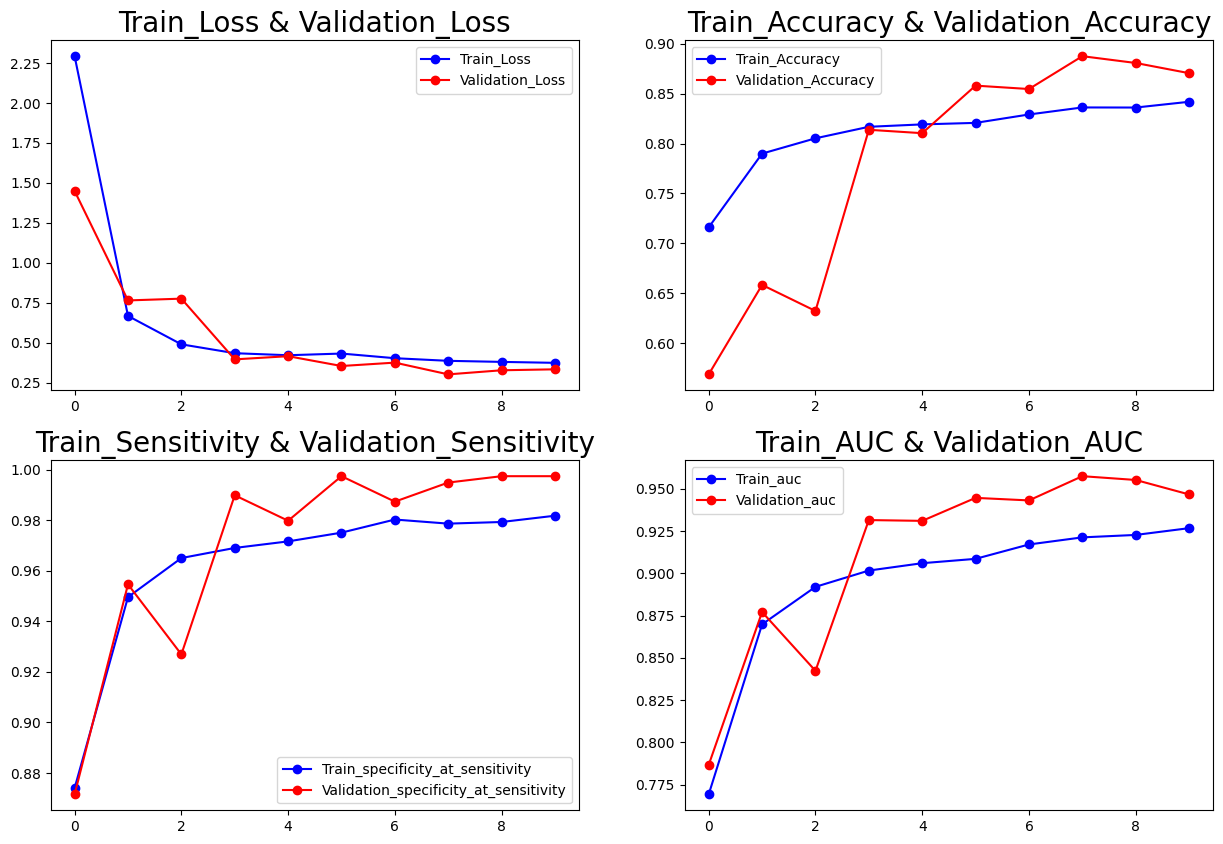

In [32]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [34]:
# Evaluate the model and unpack the results into separate variables
loss, accuracy, specificity_at_sensitivity, auc = model.evaluate(test_generator)

# Print the results
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)
print('Test Specificity at Sensitivity =', specificity_at_sensitivity)
print('Test AUC =', auc)

28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.8868 - auc: 0.5821 - loss: 0.3572 - specificity_at_sensitivity: 0.6102
Test Loss = 0.3465214967727661
Test Accuracy = 0.8683314323425293
Test Specificity at Sensitivity = 0.9895561337471008
Test AUC = 0.9403200149536133


In [35]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step


Actual  Prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
..      ...         ...
876       1           0
877       1           1
878       1           1
879       1           1
880       1           0

[881 rows x 2 columns]

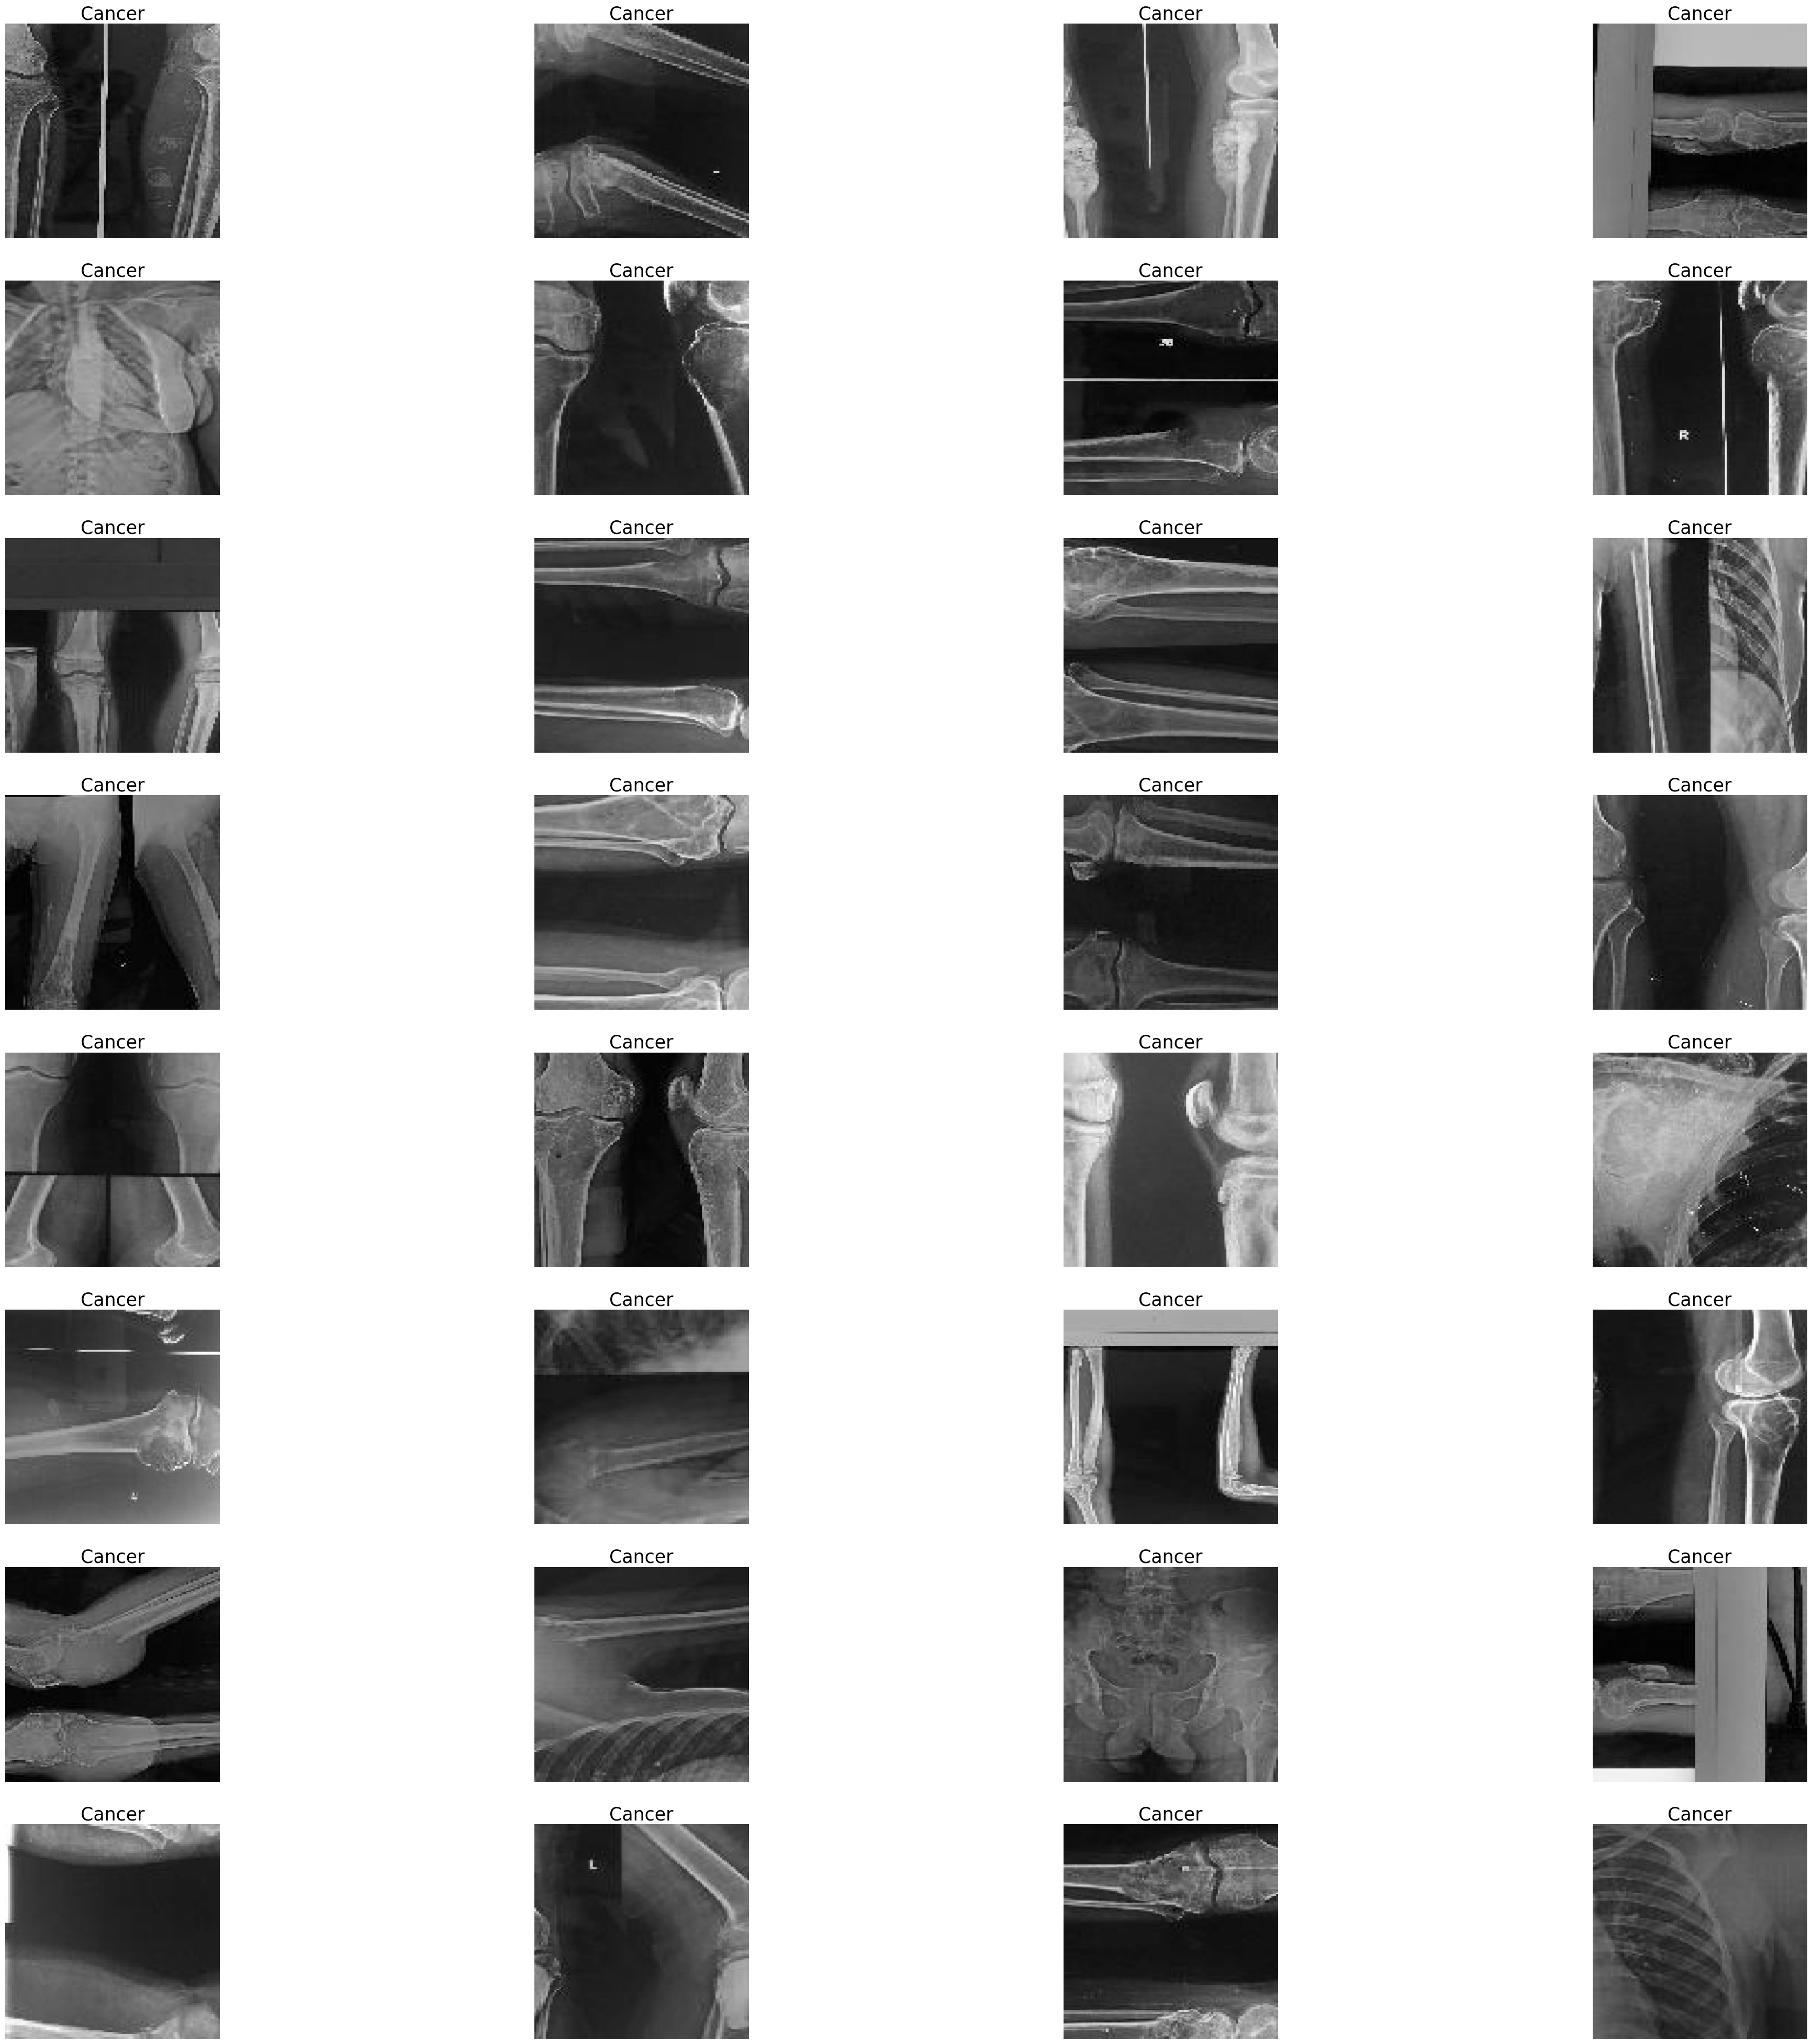

In [36]:
class_names=['Cancer', 'Normal']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [37]:
# Import the necessary library and function
from sklearn.metrics import classification_report


In [38]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer','Normal'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

      Cancer       0.84      0.86      0.85       383
      Normal       0.89      0.87      0.88       498

    accuracy                           0.87       881
   macro avg       0.87      0.87      0.87       881
weighted avg       0.87      0.87      0.87       881



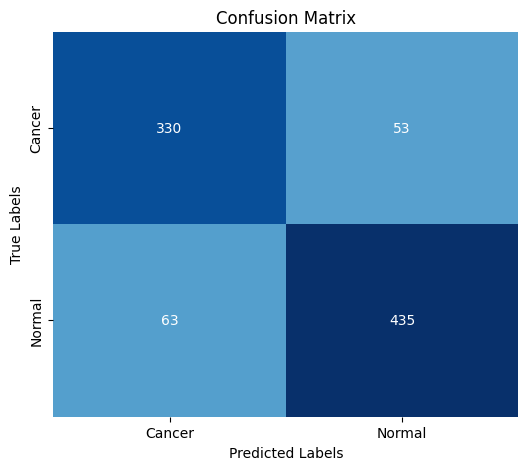

Confusion Matrix:
 [[330  53]
 [ 63 435]]


In [39]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Blues',
            xticklabels=['Cancer', 'Normal'],
            yticklabels=['Cancer', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Confusion Matrix:\n', CM)

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [41]:
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

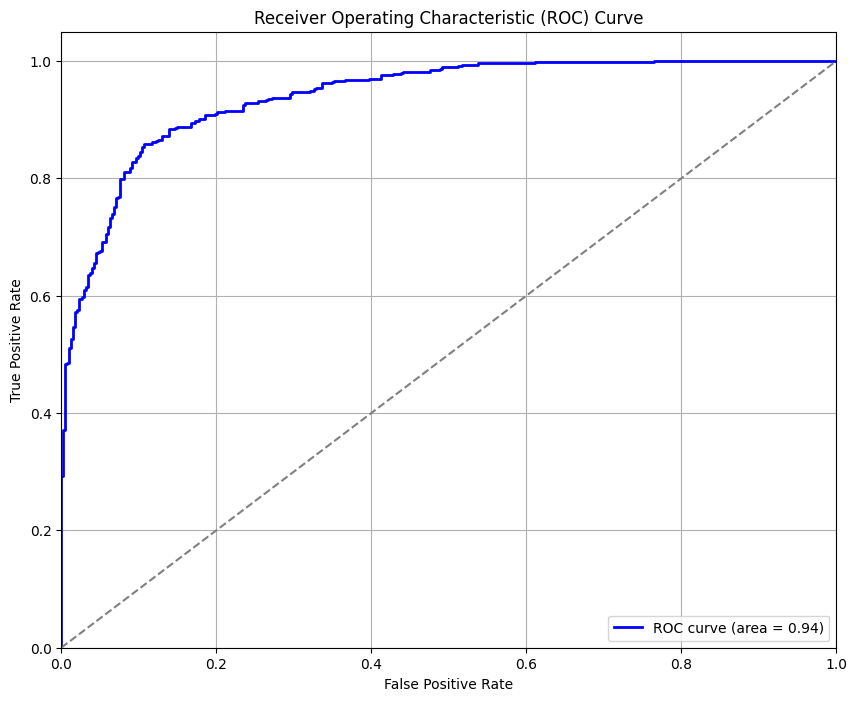

ROC AUC Score: 0.94


In [42]:
# Import the necessary library and function
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()

#Calculate fpr, tpr, and roc_auc
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f'ROC AUC Score: {roc_auc:.2f}')

In [ ]:
import os
import cv2 as cv
import random
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory for the new dataset
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'

# Folder names for the new dataset
labels = ['cancer', 'normal']

# Define the image size for model input
image_size = (224, 224)  # Adjust according to your model input size

# Function to allow user input and display images and accuracy
def user_input_and_accuracy(labels, model):
    correct_predictions = 0
    total_predictions = 0

    while True:
        # Get user input
        user_input = input(f'Enter a label ({", ".join(labels)}) or "*" to quit: ').strip().lower()
        if user_input == '*':
            break
        if user_input not in labels:
            print("Invalid input. Please enter a valid label.")
            continue

        # Select the base directory and label folder based on user input
        label_folder = os.path.join(test_dataset, user_input)

        if not os.path.exists(label_folder):
            print(f"Label folder '{user_input}' does not exist. Please check the directory.")
            continue

        # Select a random image with the user input label
        img_name = random.choice(os.listdir(label_folder))
        img_path = os.path.join(label_folder, img_name)
        img = cv.imread(img_path)
        img_resized = cv.resize(img, image_size)
        img_resized = np.expand_dims(img_resized, axis=0) / 255.0  # Rescale

        # Predict the image using the trained model
        prediction = model.predict(img_resized)
        predicted_label = labels[np.argmax(prediction)]
        prediction_percentage = prediction[0][np.argmax(prediction)] * 100

        # Display the image
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predicted: {predicted_label}\nPrediction Percentage: {prediction_percentage:.2f}%')
        plt.show()

        # Determine if the user's input is correct
        correct = user_input == predicted_label
        total_predictions += 1
        if correct:
            correct_predictions += 1

        # Calculate and display accuracy
        accuracy = (correct_predictions / total_predictions) * 100
        print(f"Actual label: {user_input}")
        print(f"Predicted label: {predicted_label}")
        print(f"Prediction percentage: {prediction_percentage:.2f}%")

        input("Press Enter to continue...")

        # Check if accuracy is below 80%
        if accuracy < 80:
            print("Accuracy is below 80%. Please try again.")
            break  # Exit loop if accuracy falls below 80%

# Assuming the model is already loaded and available, call the function
user_input_and_accuracy(labels, model)